In [1]:
styl_img = "./images/style/starry_night.jpg"
cont_img = "./images/content/tubingen.jpg"

In [2]:
import skimage
import skimage.io
import skimage.transform

import tensorflow as tf
import numpy as np

img_array = skimage.io.imread(cont_img, mode="constant", anti_aliasing=True) / 255.
img_array = np.expand_dims(img_array, 0)
img_array = img_array * 255
img_array = img_array.astype("uint8")

In [3]:
skimage.io.imsave("test.jpg", img_array[0])

In [4]:
#import utils
#img_array = utils.load_image(styl_img, (1, 768, 1024, 3))
#img_array.shape

In [5]:
#img_array = img_array * 255.
#img_array = np.clip(img_array, 0, 255).astype('uint8')[0]
#img_array

In [6]:
def _gram(features):
    features_shape = tf.shape(features)
    matrix = tf.reshape(features, shape=[features_shape[3], features_shape[1]*features_shape[2]])
    return tf.matmul(matrix, matrix, transpose_a=True)

In [7]:
img_array.shape

(1, 768, 1024, 3)

In [60]:
import utils

In [67]:
styl_path = "./images/style/starry_night.jpg"
cont_path = "./images/content/tubingen.jpg"
img_shape = (1, 300, 1000 ,3)

In [68]:
styl_img = utils.load_image(styl_path, img_shape)
cont_img = utils.load_image(cont_path, img_shape)

/usr/local/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [77]:
styl_img1 = skimage.img_as_ubyte(styl_img)
styl_img2 = np.clip(styl_img*255, 0, 255).astype("uint8") + 1

/usr/local/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


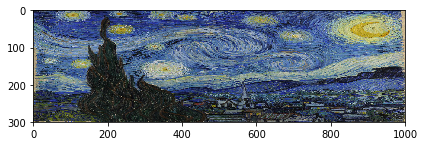

In [78]:
import skimage
#skimage.io.imsave("test.jpg", styl_img[0])
skimage.io.imshow(styl_img2[0])
skimage.io.show()

In [80]:
print(styl_img1)
print("diff")
print(styl_img2)
styl_img1 == styl_img2

[[[[ 82  88  76]
   [ 19  21  27]
   [ 36  37  62]
   ...
   [189 171 131]
   [186 169 136]
   [176 158 133]]

  [[ 52  54  70]
   [ 29  30  59]
   [ 38  37  84]
   ...
   [204 186 146]
   [170 152 113]
   [182 164 128]]

  [[ 52  56  66]
   [ 20  23  43]
   [ 24  28  58]
   ...
   [183 165 128]
   [184 164 133]
   [174 152 127]]

  ...

  [[123 111  72]
   [ 74  66  32]
   [ 69  66  39]
   ...
   [ 96  90  71]
   [ 83  72  55]
   [124 111  95]]

  [[169 138  94]
   [125  97  58]
   [122  99  66]
   ...
   [112  99  65]
   [128 116  76]
   [145 133  91]]

  [[165 154 112]
   [134 123  88]
   [140 132 102]
   ...
   [181 163 127]
   [161 144 106]
   [196 179 141]]]]
diff
[[[[ 82  88  76]
   [ 20  22  28]
   [ 36  37  63]
   ...
   [190 171 131]
   [186 169 137]
   [176 159 133]]

  [[ 53  54  71]
   [ 30  30  60]
   [ 39  37  84]
   ...
   [204 186 146]
   [171 153 114]
   [183 165 128]]

  [[ 52  56  66]
   [ 21  24  43]
   [ 25  28  59]
   ...
   [183 165 129]
   [185 165 134]
   [174

array([[[[ True,  True,  True],
         [False, False, False],
         [ True,  True, False],
         ...,
         [False,  True,  True],
         [ True,  True, False],
         [ True, False,  True]],

        [[False,  True, False],
         [False,  True, False],
         [False,  True,  True],
         ...,
         [ True,  True,  True],
         [False, False, False],
         [False, False,  True]],

        [[ True,  True,  True],
         [False, False,  True],
         [False,  True, False],
         ...,
         [ True,  True, False],
         [False, False, False],
         [ True,  True,  True]],

        ...,

        [[ True, False,  True],
         [False,  True,  True],
         [ True,  True,  True],
         ...,
         [False, False,  True],
         [ True,  True, False],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [False, False, False],
         [False, False,  True],
         ...,
         [ True,  True,  True],
         [ T

In [14]:
img_array = np.float32(img_array)

In [15]:
def reshape(x, b, c, h, w):
    return tf.reshape(matrix, shape=(b, c, h*w))

def transpose(x):
    return tf.transpose(x, perm=(0, 3, 1, 2))

In [16]:
def gram1(matrix):
    b, h, w, c = matrix.shape
    x = tf.transpose(matrix, perm=(0, 3, 1, 2))
    y = tf.reshape(x, shape=(c, h*w))
    return tf.matmul(y, y, transpose_b=True)

def gram2(matrix):
    b, h, w, c = matrix.shape
    y = tf.reshape(matrix, shape=(c, h*w))
    return tf.matmul(y, y, transpose_b=True)

In [17]:
with tf.Session() as sess:
    m1 = gram1(img_array)
    m2 = gram2(img_array)
    
    print(sess.run(m1))
    print()
    print(sess.run(m2))
    
    print(sess.run(m1) == sess.run(m2)) 

[[1.0870330e+10 1.1224902e+10 1.1064971e+10]
 [1.1224902e+10 1.2443141e+10 1.3059055e+10]
 [1.1064971e+10 1.3059055e+10 1.4557067e+10]]

[[1.5059393e+10 1.3822617e+10 7.5942953e+09]
 [1.3822617e+10 1.6954104e+10 8.4132306e+09]
 [7.5942953e+09 8.4132306e+09 5.8570445e+09]]
[[False False False]
 [False False False]
 [False False False]]


In [18]:
from datetime import datetime

import numpy as np
import tensorflow as tf
from tensorflow.contrib.opt import ScipyOptimizerInterface

from style_transfer2 import StyleTransfer
import utils

In [23]:
# image paths
styl_path = './images/style/starry_night.jpg'
cont_path = './images/content/tubingen.jpg'
folder = "./gen_img/"

# hyper-parameters
#img_shape = utils.optimal_dimension(cont_path, square=False) # [batch, width, height, channels]
img_shape = np.array((1, 224, 224, 3))
alpha = 1e-3        # content weight alpha
beta = 1            # style weight beta
num_steps = 1000     # training iterations
save_per_step = 5   # save image per this number of step

In [24]:
# content and style layers used in style transfer
cont_layers = ["conv4_2"]
styl_layers = ["conv1_1", "conv2_1", "conv3_1", "conv4_1", "conv5_1"]

    # weights on each style layer
styl_weights = {"conv1_1": 0.2, "conv1_2": 0.2, "pool1": 0,
                "conv2_1": 0.2, "conv2_2": 0, "pool2": 0,
                "conv3_1": 0.2, "conv3_2": 0, "conv3_3": 0.2, "conv3_4": 0, "pool3": 0,
                "conv4_1": 0.2, "conv4_2": 0, "conv4_3": 0.2, "conv4_4": 0, "pool4": 0,
                "conv5_1": 0.2, "conv5_2": 0, "conv5_3": 0.2, "conv5_4": 0, "pool5": 0}

In [25]:
################
## PREPROCESS ##
################

cont_img = utils.load_image(cont_path, img_shape)
styl_img = utils.load_image(styl_path, img_shape)
init_img = utils.load_init_image(cont_img, styl_img, img_shape, choice="rand_uni")

model = StyleTransfer(init_img,
                      cont_img,
                      styl_img,
                      cont_layers,
                      styl_layers,
                      styl_weights,
                      alpha,
                      beta)

/usr/local/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [26]:
with tf.Session(graph=model.graph) as sess:
    sess.run(tf.global_variables_initializer())
    optimizer = ScipyOptimizerInterface(model.total_loss, method="L-BFGS-B", options={'maxiter': num_steps})
    optimizer.minimize(sess,
                       fetches=[model.styl_loss, model.cont_loss, model.total_loss],
                       step_callback=model.step_callback(img_shape, save_per_step),
                       loss_callback=model.loss_callback())
    result_array = sess.run(model.image)
    utils.save_image(folder, result_array)

Step: 0	Style Loss: 1178830848.0	Content Loss: 31878588416.0	Total Loss: 1210709376.0
Step: 1	Style Loss: 1035172864.0	Content Loss: 31328149504.0	Total Loss: 1066500992.0
Step: 2	Style Loss: 495231616.0	Content Loss: 29426798592.0	Total Loss: 524658432.0
Step: 3	Style Loss: 327030560.0	Content Loss: 28841615360.0	Total Loss: 355872192.0
Step: 4	Style Loss: 146723408.0	Content Loss: 29692375040.0	Total Loss: 176415776.0
[[[[116.36987448 202.06919325  22.44268184]
   [145.8388199   78.50375683  40.46868228]
   [ 34.72259928 173.74320171  38.1788616 ]
   ...
   [ 45.76219692 166.14918425 163.71397739]
   [196.46762604  17.43297503  50.77727975]
   [111.6009251   45.7913263   93.88567172]]

  [[ -1.91710344 199.79721682 206.55299199]
   [118.50199077 174.13577887 208.73515716]
   [101.67451664 111.14698904  93.74127531]
   ...
   [ 62.33451846 134.23903156  58.78719454]
   [  9.90092343  33.35950072 211.58480226]
   [239.04105667 132.92890822  71.41637989]]

  [[145.0926656  247.52185213 

Step: 20	Style Loss: 8063962.0	Content Loss: 21854808064.0	Total Loss: 29918772.0
Step: 21	Style Loss: 8664695.0	Content Loss: 21268779008.0	Total Loss: 29933476.0
Step: 22	Style Loss: 7808869.5	Content Loss: 21488185344.0	Total Loss: 29297056.0
Step: 23	Style Loss: 7342284.5	Content Loss: 21208195072.0	Total Loss: 28550480.0
Step: 24	Style Loss: 6893285.5	Content Loss: 20765556736.0	Total Loss: 27658844.0
[[[[119.02110903 194.80336094  24.34996179]
   [149.22625332  67.68772007  45.40199262]
   [ 41.76690295 168.99900364  51.49900669]
   ...
   [ 39.55546592 153.89072095 163.12306144]
   [190.40015361   8.60464076  44.71656797]
   [110.38883088  44.93181524  91.22975172]]

  [[ -6.83703067 177.2839588  202.00019572]
   [107.80602244 138.9267867  203.17265198]
   [ 95.00986357  85.79923243 101.24138323]
   ...
   [ 49.72581591 111.02385506  58.83122347]
   [ -6.13805356  10.59474645 197.09170524]
   [230.61783026 122.61847844  60.84358341]]

  [[139.34159539 228.1902095  150.77115296]


Step: 40	Style Loss: 4768462.5	Content Loss: 15568146432.0	Total Loss: 20336610.0
Step: 41	Style Loss: 4695661.5	Content Loss: 15381144576.0	Total Loss: 20076806.0
Step: 42	Style Loss: 4617486.5	Content Loss: 15172827136.0	Total Loss: 19790314.0
Step: 43	Style Loss: 4545201.0	Content Loss: 14972196864.0	Total Loss: 19517400.0
Step: 44	Style Loss: 4467950.0	Content Loss: 14735036416.0	Total Loss: 19202988.0
[[[[121.10494635 190.42244474  24.43286599]
   [150.25251023  60.80532343  45.88652097]
   [ 39.29951966 160.42823399  53.32634015]
   ...
   [ 37.06763422 154.99585048 159.7166563 ]
   [188.95418612   8.51921838  38.00049174]
   [111.71563752  47.32082052  88.31874776]]

  [[ -7.20267051 165.58943198 197.52827752]
   [100.40417452 118.10764938 194.03269114]
   [ 85.60499922  69.33175948 100.1319895 ]
   ...
   [ 42.19790982 107.34676972  48.74353233]
   [-12.40930623   5.97705338 181.53389946]
   [230.28251151 123.50569629  53.03386684]]

  [[137.65159953 217.45737374 145.85250196]


Step: 60	Style Loss: 3786292.0	Content Loss: 12872997888.0	Total Loss: 16659290.0
Step: 61	Style Loss: 3769167.75	Content Loss: 12746766336.0	Total Loss: 16515935.0
Step: 62	Style Loss: 3738891.0	Content Loss: 12635496448.0	Total Loss: 16374388.0
Step: 63	Style Loss: 3722571.0	Content Loss: 12556898304.0	Total Loss: 16279470.0
Step: 64	Style Loss: 3753027.0	Content Loss: 12415804416.0	Total Loss: 16168832.0
[[[[123.8565147  187.8406039   24.22494018]
   [151.07868393  53.65495726  43.47617253]
   [ 35.16280779 148.94187897  49.59033097]
   ...
   [ 30.04382244 157.02762102 157.42027942]
   [183.32401061   7.27165455  31.52824342]
   [110.27046575  47.75699262  84.99522883]]

  [[ -2.40576543 161.25756756 197.16492934]
   [101.53764365 106.26960269 189.90207983]
   [ 86.11448965  61.05186172 103.71221411]
   ...
   [ 31.28449729 109.64264585  44.0368612 ]
   [-22.63784601   2.42470158 169.11565262]
   [226.75397888 122.52515763  45.83114162]]

  [[138.25366878 207.85084699 141.30113979]

Step: 80	Style Loss: 3384023.25	Content Loss: 11579507712.0	Total Loss: 14963531.0
Step: 81	Style Loss: 3369513.25	Content Loss: 11550919680.0	Total Loss: 14920433.0
Step: 82	Style Loss: 3352179.0	Content Loss: 11483421696.0	Total Loss: 14835601.0
Step: 83	Style Loss: 3353973.25	Content Loss: 11410955264.0	Total Loss: 14764929.0
Step: 84	Style Loss: 3346501.75	Content Loss: 11347411968.0	Total Loss: 14693915.0
[[[[127.24361757 187.33009785  25.26005599]
   [152.12847861  48.02545894  41.13395047]
   [ 29.31902531 136.62907189  42.19585603]
   ...
   [ 21.16719512 158.81658213 155.65882511]
   [176.5883948    5.62146961  24.90848875]
   [108.59043633  47.92030915  81.48027427]]

  [[  4.71153153 162.09397969 200.94223855]
   [104.98746998  99.6666718  189.07712274]
   [ 85.41177971  53.52048592 103.64320394]
   ...
   [ 19.65209204 112.63383305  42.55066433]
   [-32.62952735  -0.98842249 158.3498219 ]
   [223.64043539 121.23675265  38.90943487]]

  [[138.7717509  200.36387925 139.015503

Step: 100	Style Loss: 3186632.0	Content Loss: 10842007552.0	Total Loss: 14028640.0
Step: 101	Style Loss: 3156500.5	Content Loss: 10845445120.0	Total Loss: 14001946.0
Step: 102	Style Loss: 3154196.25	Content Loss: 10810559488.0	Total Loss: 13964756.0
Step: 103	Style Loss: 3167140.75	Content Loss: 10764843008.0	Total Loss: 13931985.0
Step: 104	Style Loss: 3169432.5	Content Loss: 10736590848.0	Total Loss: 13906024.0
[[[[130.89134388 188.81884108  27.21835104]
   [155.34442539  46.71342241  41.20812908]
   [ 26.95795996 128.57141041  36.33035994]
   ...
   [ 16.7543409  158.41374508 152.64604749]
   [173.81199301   5.20078854  19.72851571]
   [108.57670824  48.78387482  78.74833225]]

  [[ 12.85729351 166.43381212 206.84764917]
   [111.85841689  98.85553976 191.4064476 ]
   [ 86.38725403  45.84810969  99.66069427]
   ...
   [ 15.99585732 113.25117038  40.71432018]
   [-34.75533503  -0.84681394 151.93123787]
   [224.12493735 122.102964    34.50566602]]

  [[140.20112878 195.59562305 138.280

Step: 120	Style Loss: 3046038.75	Content Loss: 10432047104.0	Total Loss: 13478087.0
Step: 121	Style Loss: 3069124.5	Content Loss: 10382040064.0	Total Loss: 13451166.0
Step: 122	Style Loss: 3060983.75	Content Loss: 10379077632.0	Total Loss: 13440062.0
Step: 123	Style Loss: 3065202.5	Content Loss: 10353292288.0	Total Loss: 13418496.0
Step: 124	Style Loss: 3069604.25	Content Loss: 10338626560.0	Total Loss: 13408231.0
[[[[133.9571307  190.52262408  29.51924946]
   [157.73854011  45.78923901  41.42352259]
   [ 23.82195446 121.01374676  29.75216157]
   ...
   [ 13.84088321 156.34868519 150.42606884]
   [172.57043461   4.29490857  15.39364425]
   [109.11669086  48.96108186  75.98719037]]

  [[ 21.0623205  172.55762217 214.54924626]
   [117.17258695  98.68866196 193.72565262]
   [ 85.3785537   38.27045146  93.33832659]
   ...
   [ 13.70402565 110.44195574  39.87067321]
   [-34.90759622  -1.68051818 147.0275641 ]
   [225.63028764 122.23315298  30.54860271]]

  [[140.55195818 191.74559063 138.49

Step: 140	Style Loss: 2969694.25	Content Loss: 10147845120.0	Total Loss: 13117540.0
Step: 141	Style Loss: 2975259.5	Content Loss: 10123887616.0	Total Loss: 13099148.0
Step: 142	Style Loss: 2979255.25	Content Loss: 10105944064.0	Total Loss: 13085200.0
Step: 143	Style Loss: 2970847.0	Content Loss: 10099283968.0	Total Loss: 13070131.0
Step: 144	Style Loss: 2967064.5	Content Loss: 10090170368.0	Total Loss: 13057236.0
[[[[135.59904705 191.86972499  31.08470028]
   [158.63841999  45.38338381  41.41412644]
   [ 20.57775178 115.97241352  24.75424007]
   ...
   [ 11.46426376 155.13539723 151.32021871]
   [171.38101717   3.35865292  13.38478532]
   [109.24711498  48.50221281  74.05381636]]

  [[ 27.59928429 179.10898744 222.07804388]
   [120.28888978  99.92798023 196.50902006]
   [ 83.57774209  34.25967902  89.62194514]
   ...
   [ 11.34723816 108.99072073  43.41673628]
   [-35.23328979  -2.11838709 145.94385108]
   [226.4641581  121.74794557  28.16408941]]

  [[139.99339042 189.52262318 139.781

Step: 160	Style Loss: 2920491.25	Content Loss: 9952291840.0	Total Loss: 12872783.0
Step: 161	Style Loss: 2912023.75	Content Loss: 9950607360.0	Total Loss: 12862632.0
Step: 162	Style Loss: 2918335.5	Content Loss: 9934054400.0	Total Loss: 12852390.0
Step: 163	Style Loss: 2915652.0	Content Loss: 9924968448.0	Total Loss: 12840621.0
Step: 164	Style Loss: 2939099.5	Content Loss: 9889822720.0	Total Loss: 12828922.0
[[[[137.30135216 193.35885975  32.42865068]
   [159.87810766  45.36455256  41.5013143 ]
   [ 17.6440102  111.37294894  20.23024385]
   ...
   [  9.00998865 154.17042462 154.95142793]
   [169.34330235   1.60077639  13.26983741]
   [108.03736688  46.4921552   72.46986892]]

  [[ 34.50821538 186.06285964 229.52215239]
   [124.00326039 101.68003025 199.49414763]
   [ 81.74520622  30.07143534  86.07554803]
   ...
   [  9.21152087 108.60311712  51.21796709]
   [-36.3874895   -3.01202319 148.22802316]
   [225.35143787 119.19163276  26.51872191]]

  [[139.23435    186.80531617 140.17713489

Step: 180	Style Loss: 2893407.5	Content Loss: 9794328576.0	Total Loss: 12687736.0
Step: 181	Style Loss: 2893826.25	Content Loss: 9786896384.0	Total Loss: 12680723.0
Step: 182	Style Loss: 2889968.5	Content Loss: 9780158464.0	Total Loss: 12670128.0
Step: 183	Style Loss: 2886133.25	Content Loss: 9779618816.0	Total Loss: 12665752.0
Step: 184	Style Loss: 2879450.75	Content Loss: 9779725312.0	Total Loss: 12659177.0
[[[[ 1.38684039e+02  1.94201744e+02  3.35662381e+01]
   [ 1.61112861e+02  4.51630670e+01  4.20255019e+01]
   [ 1.53202264e+01  1.07583706e+02  1.71755573e+01]
   ...
   [ 7.15929865e+00  1.54349733e+02  1.59755656e+02]
   [ 1.67179219e+02 -1.09118373e-01  1.41023803e+01]
   [ 1.06216170e+02  4.38861136e+01  7.11448325e+01]]

  [[ 4.02545021e+01  1.91404544e+02  2.35730058e+02]
   [ 1.27119067e+02  1.02787176e+02  2.02257530e+02]
   [ 8.03435223e+01  2.71255921e+01  8.40460605e+01]
   ...
   [ 7.03566485e+00  1.08615965e+02  5.91775485e+01]
   [-3.79424752e+01 -4.18420640e+00  1.51

KeyboardInterrupt: 